# Dimensionality Reduction with PCA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import metrics, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Dataset and Parameters

In [2]:
data = datasets.load_iris()
X = data.data
y = data.target

In [3]:
feature_names = data.feature_names
class_names = data.target_names
random_state = 123

### PCA Requirements

In [4]:
# Convert data into unit scale 
X_tr = StandardScaler().fit_transform(X, y)

In [5]:
X_tr[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

### Dimensionality Reduction with PCA

In [6]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [7]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [8]:
X_new[:3]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943]])

### Plot Data with New Features

In [9]:
principal_components = pd.DataFrame(data=X_new, columns=['PC1', 'PC2'])
principal_components['target'] = y

In [10]:
principal_components.head(2)

,PC1,PC2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0


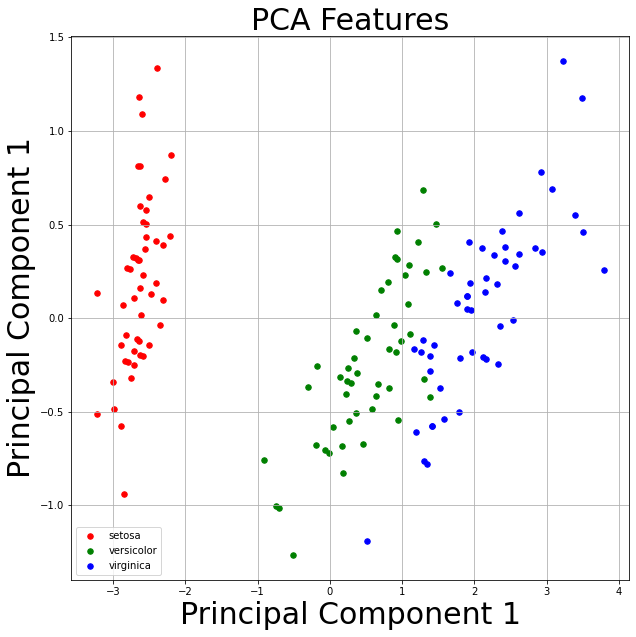

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
fontsize=30
ax.set_title('PCA Features', fontsize=fontsize)
ax.set_xlabel('Principal Component 1', fontsize=fontsize)
ax.set_ylabel('Principal Component 1', fontsize=fontsize)

colors = 'r,g,b'.split(',')
for class_name, color in zip(range(3), colors):
    ax.scatter(
        principal_components.loc[principal_components.target == class_name, 'PC1'],
        principal_components.loc[principal_components.target == class_name, 'PC2'],
        c=color,
        s=fontsize
    )
    ax.legend(class_names)
    ax.grid()